https://www.youtube.com/watch?v=P4u5drToePM&t=85s

# 3 pattern extraction methods:
1. rolling window algorithm: (local top/bottom of order N)
2. directional change algorithm (high low, retrace-ment, atr)
    - support/resistance recognition
3. perceptually important points (clustering)
    - data mining patterns

# perceptually important:
| Feature                | `dist_measure=1`<br>**Euclidean**                                                    | `dist_measure=2`<br>**Perpendicular**              | `dist_measure=3`<br>**Vertical**           |                   |                                     |              |          |
| ---------------------- | ------------------------------------------------------------------------------------ | -------------------------------------------------- | ------------------------------------------ | ----------------- | ----------------------------------- | ------------ | -------- |
| **Definition**         | Sum of Euclidean distances from candidate to both endpoints                          | Orthogonal distance from point to the line segment | Absolute y-diff from line at that x        |                   |                                     |              |          |
| **Formula**            | <div style="white-space:nowrap;">`√((x1−x)² + (y1−y)²) + √((x2−x)² + (y2−y)²)`</div> | <div style="white-space:nowrap;">\`                | y - (mx + b)                               | / √(m²+1)\`</div> | <div style="white-space:nowrap;">\` | y - (mx + b) | \`</div> |
| **Captures**           | Overall closeness to segment endpoints                                               | True shape deviation (angle-preserving)            | Simple deviation in price                  |                   |                                     |              |          |
| **Geometric Meaning**  | Approximates total arc distance                                                      | Distance orthogonal to fitted line                 | Vertical “residual” to fitted line         |                   |                                     |              |          |
| **Scale Sensitivity**  | Sensitive to both x and y scales                                                     | Scale-invariant (geometrically pure)               | Sensitive to y-scale only                  |                   |                                     |              |          |
| **Noise Sensitivity**  | Medium                                                                               | Low                                                | High (especially in flat/sloped lines)     |                   |                                     |              |          |
| **Computational Cost** | Highest (2 distances per point per segment)                                          | Medium (1 square root)                             | Lowest (1 subtraction and `abs`)           |                   |                                     |              |          |
| **Common Use Case**    | Captures prominent arcs or waves                                                     | Preserves shape and structure                      | Quick visual segmentation, spike detection |                   |                                     |              |          |

Euclidean (1): Best when both the time and price variations are important (e.g., swing shape detection).
Perpendicular (2): Best for shape-preserving pattern discovery or clean, noise-robust keypoint extraction.
Vertical (3): Best for quick-and-dirty spike or anomaly detection; very fast but less robust to slope changes.

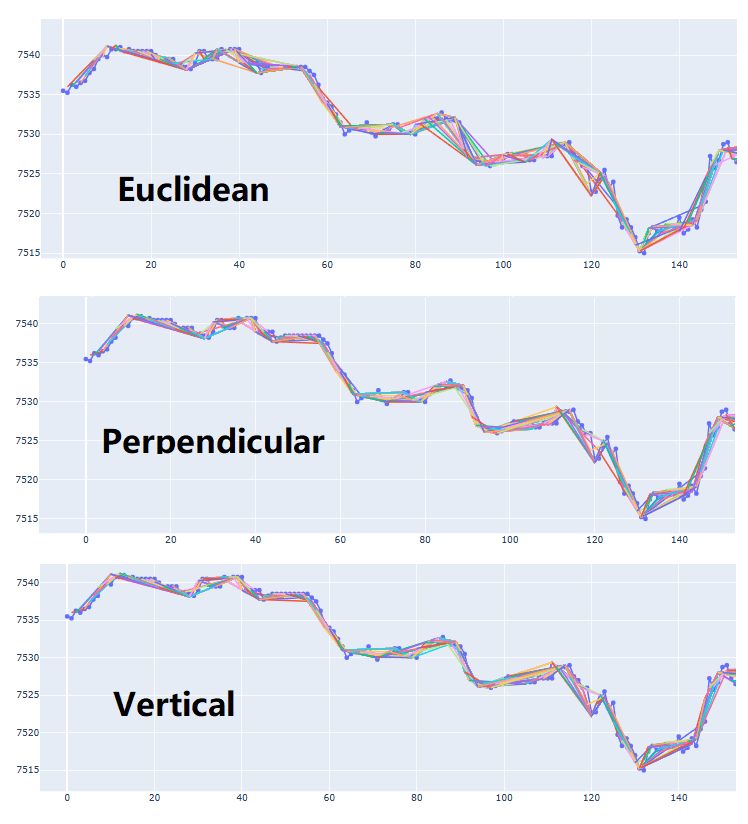

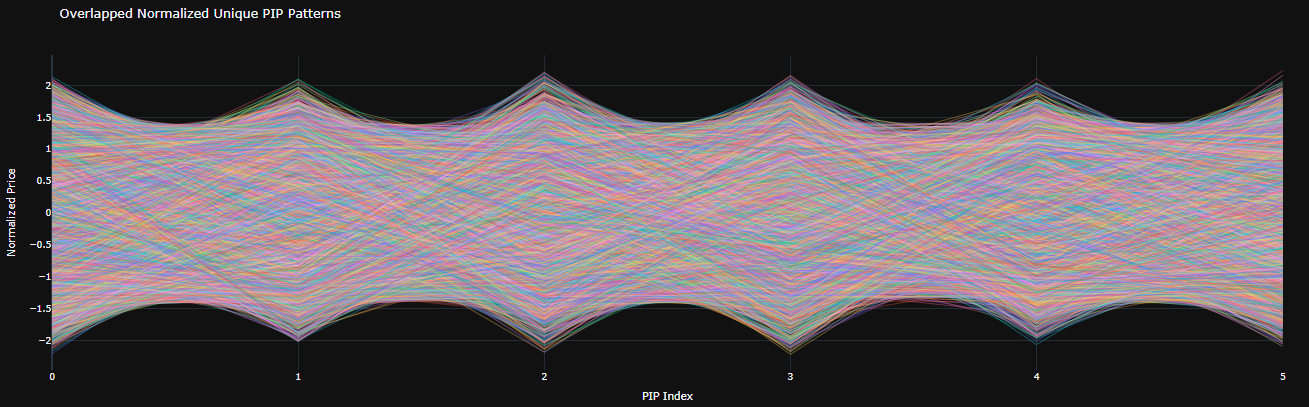

### if PIP length is too big(e.g. > 6), the cluster isn't clustering well
### it is preferred to perform multi-timeframe analysis(perceptually important points) and cluster multiple times

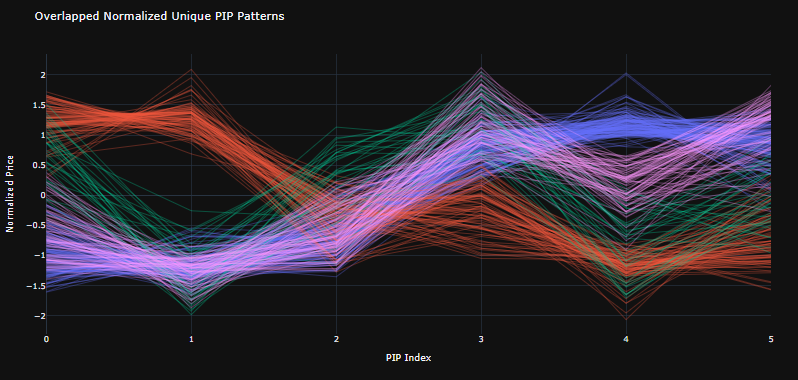

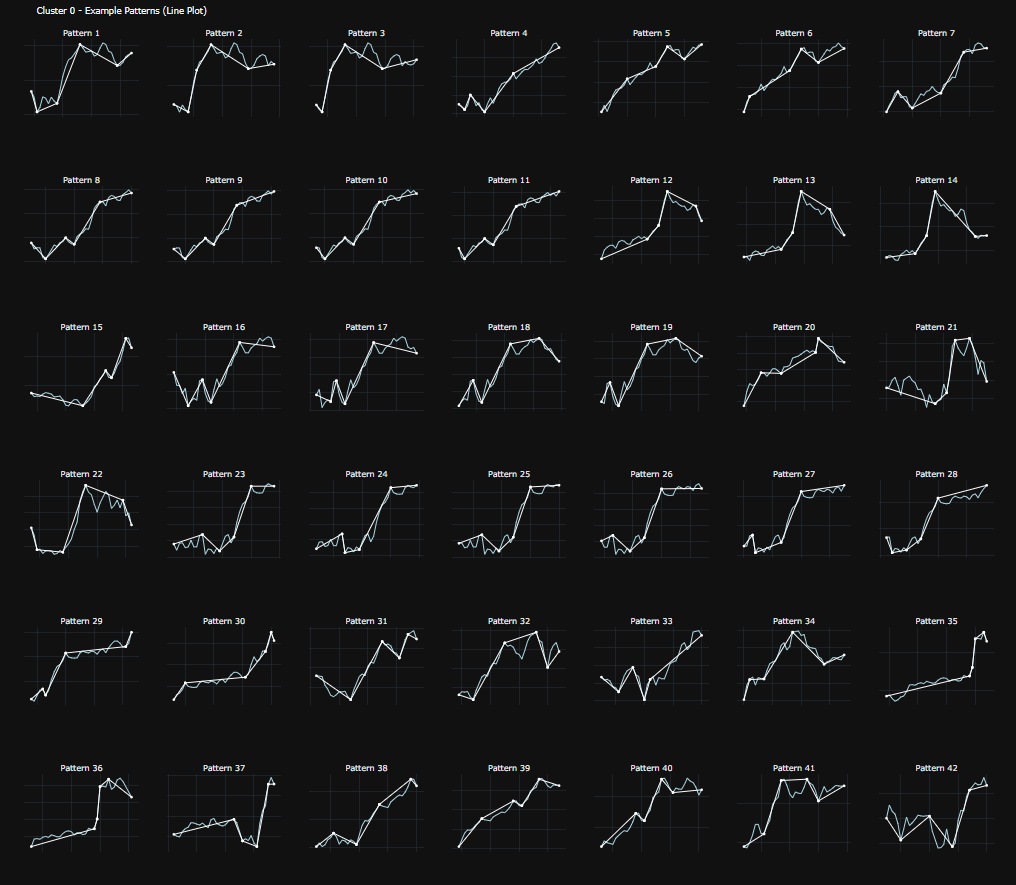

- you can add exponential weights (0->N) to force patterns in a cluster to have similar exits

### Long and Short Patterns
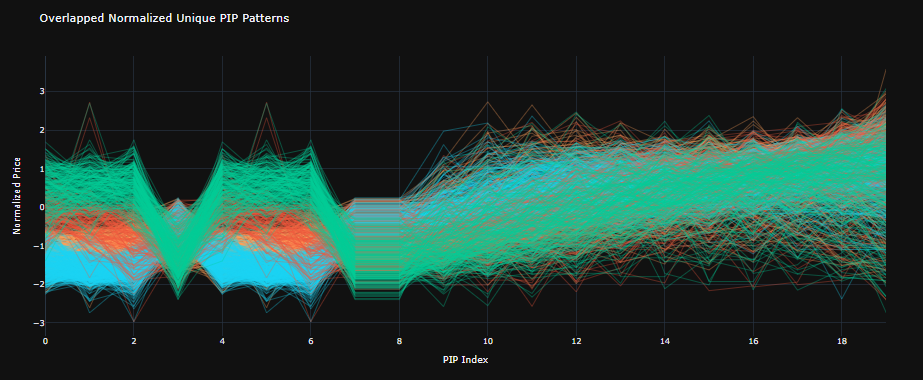
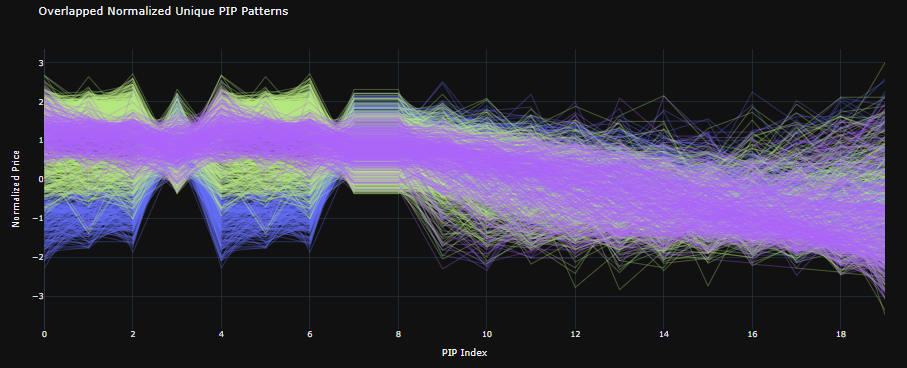

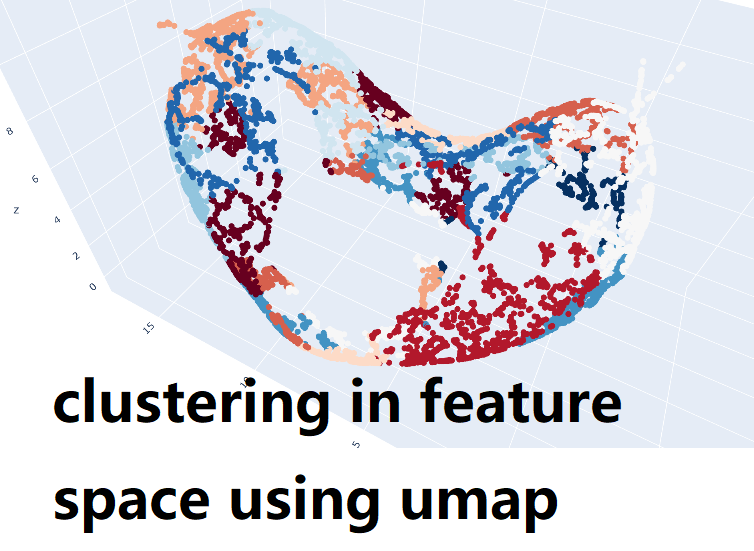

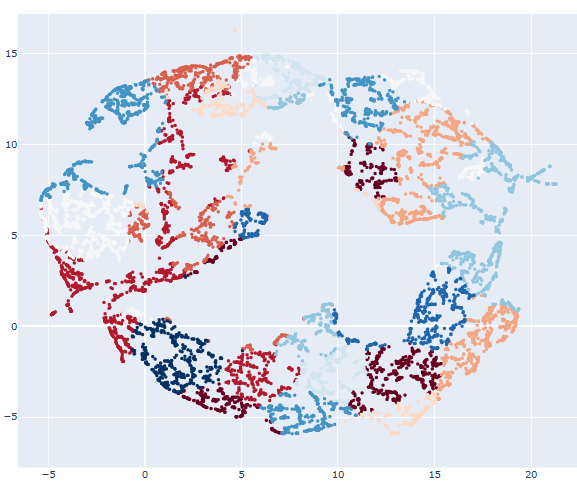

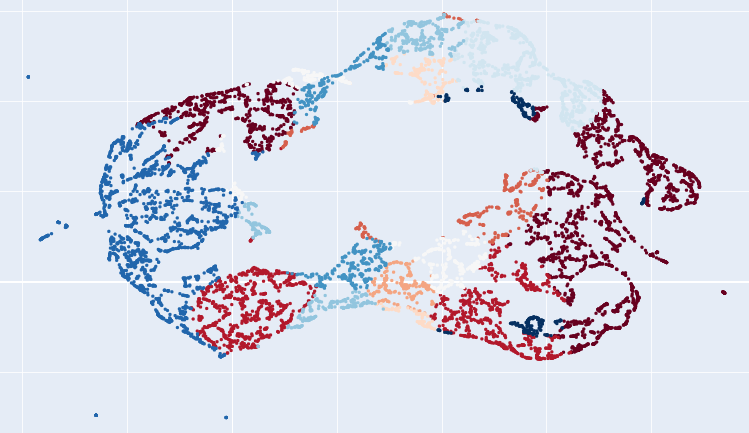

### Extremely good, as we are not performing any factor/filtering/stop_loss/hedging

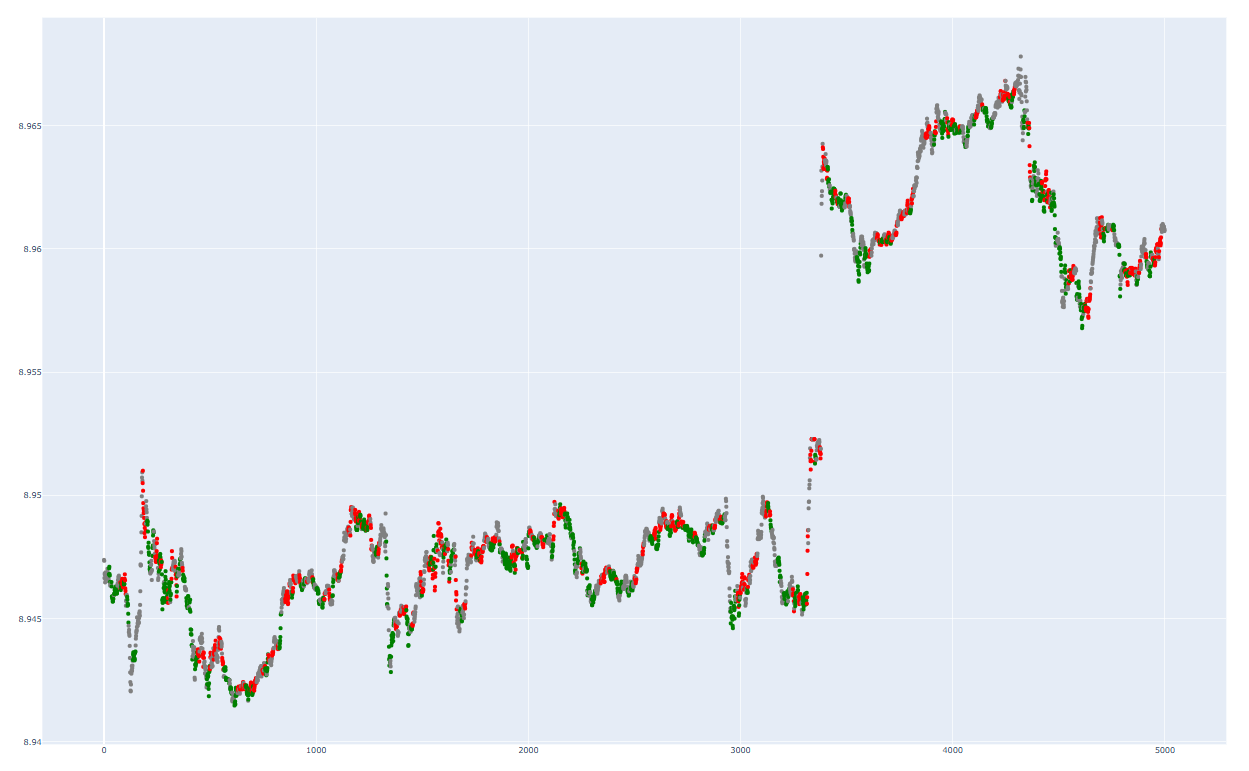

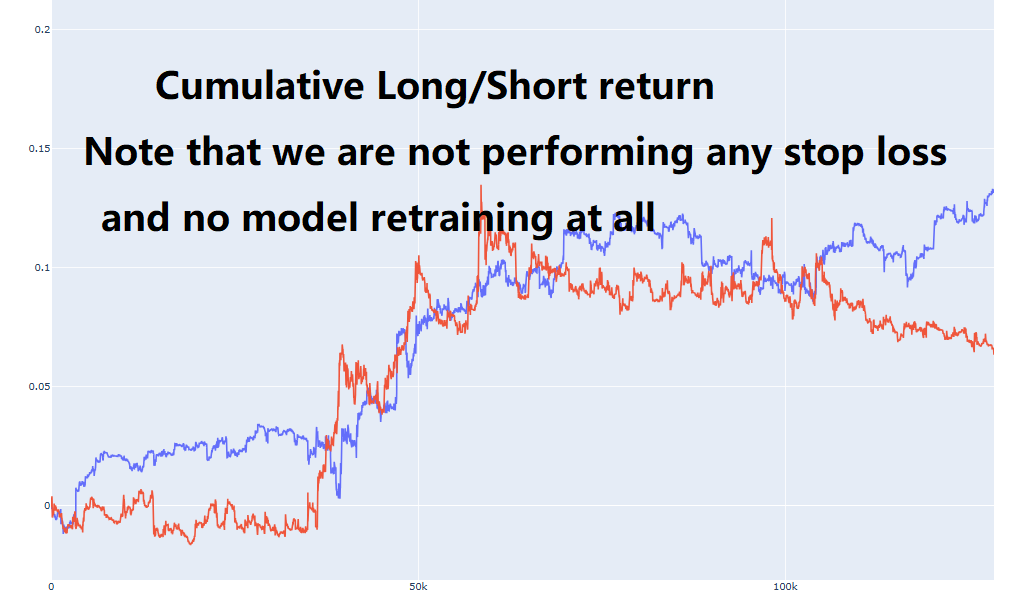

<div style="font-size: 10px;">

| Aspect                                   | **Manifold Learning**                                                                                | **Representation Learning**                                                                               | **Self-Supervised Learning**                                                                                   |
| ---------------------------------------- | ---------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Core Idea**                            | High-dimensional data lies on a lower-dimensional manifold that preserves key structural properties. | Learn useful representations (features) from raw data without supervision to improve downstream tasks.    | Create artificial (pseudo) labels to learn useful features from unlabeled data.                                |
| **Main Goal**                            | Discover the intrinsic low-dimensional geometry of the data.                                         | Transform data into a representation that makes learning tasks easier (e.g., clustering, classification). | Leverage structural patterns in data to train models as if supervised, often improving generalization.         |
| **Typical Output**                       | Low-dimensional embedding of the input data (e.g., 2D/3D for visualization).                         | Latent features (vectors) in an optimized feature space.                                                  | Feature encoder trained using surrogate tasks (e.g., contrastive loss, pretext tasks).                         |
| **Relation to Clustering**               | Often used **before clustering** to make clusters more separable in low-dim space.                   | Clustering is often used **after** representation learning to group data in latent space.                 | Clustering can be used **during training** to provide pseudo-labels or contrastive anchors.                    |
| **Relation to Dimensionality Reduction** | Core technique: nonlinear dimensionality reduction (e.g., t-SNE, UMAP, Isomap).                      | Often includes DR implicitly via learned bottlenecks (e.g., in autoencoders, PCA, CNNs).                  | Not always dimensionality reduction, but learns meaningful structure; can include contrastive embeddings.      |
| **Learning Type**                        | Unsupervised                                                                                         | Unsupervised / Self-supervised / Semi-supervised                                                          | Self-supervised (a subset of unsupervised)                                                                     |
| **Label Use**                            | No labels used                                                                                       | No labels used (except in fine-tuning)                                                                    | Uses pseudo-labels (e.g., from data augmentations, clustering)                                                 |
| **Examples**                             | t-SNE, UMAP, Isomap, LLE                                                                             | Autoencoders, PCA, Deep Embedded Clustering (DEC), SimCLR encoder                                         | SimCLR, MoCo, BYOL, SwAV, DINO                                                                                 |
| **Assumptions**                          | Data lies on or near a smooth low-dim manifold.                                                      | Data has latent factors that can be disentangled or compressed.                                           | Data contains inherent structure (e.g., spatial, temporal, similarity) that can be exploited via clever tasks. |
| **Optimization Target**                  | Preserve local or global distances in embedding space.                                               | Minimize reconstruction loss, contrastive loss, clustering loss, etc.                                     | Maximize agreement under different views; minimize pretext task error.                                         |
| **Pros**                                 | Effective for visualization and understanding structure.                                             | Generic, reusable embeddings; enables transfer learning.                                                  | Learns features without labels; robust to noise.                                                               |
| **Cons**                                 | Sensitive to noise; doesn't scale well to high-dim data or very large datasets.                      | May require tuning or downstream task supervision to be useful.                                           | Performance depends heavily on pretext task and augmentation strategy.                                         |
| **Use Cases**                            | Visualization, preprocessing for clustering or classification.                                       | Feature extraction, unsupervised clustering, anomaly detection.                                           | Pretraining for downstream tasks, label-efficient training.                                                    |
| **Connection to Deep Learning**          | Mostly non-deep methods, but recent deep variants exist (e.g., parametric UMAP).                     | Central to deep learning; used in autoencoders, deep clustering, etc.                                     | Modern deep learning approach; often used to pretrain large models like transformers or ResNets.               |

| **Category**                            | **Subcategory**            | **Method**                              | **Key Ideas / Mechanism**                        | **Typical Use Cases**             |
| --------------------------------------- | -------------------------- | --------------------------------------- | ------------------------------------------------ | --------------------------------- |
| **1. Matrix Factorization**             | Linear Methods             | PCA (Principal Component Analysis)      | Maximize variance in orthogonal basis            | Compression, visualization        |
|                                         |                            | ICA (Independent Component Analysis)    | Separate statistically independent signals       | Source separation                 |
|                                         |                            | NMF (Non-negative Matrix Factorization) | Parts-based decomposition                        | Topic modeling, bioinformatics    |
| **2. Manifold Learning**                | Nonlinear Dim. Reduction   | t-SNE                                   | Preserve local similarity in 2D/3D               | Visualization                     |
|                                         |                            | UMAP                                    | Preserve local/global structure on manifolds     | Visualization, clustering         |
|                                         |                            | Isomap                                  | Preserve geodesic distances                      | Manifold discovery                |
|                                         |                            | LLE (Locally Linear Embedding)          | Linear reconstruction in local neighborhood      | Unsupervised structure discovery  |
| **3. Autoencoders**                     | Classical                  | Vanilla Autoencoder                     | Learn encoder-decoder for reconstruction         | Denoising, anomaly detection      |
|                                         |                            | Sparse Autoencoder                      | Enforce sparsity on latent code                  | Feature extraction                |
|                                         |                            | Denoising Autoencoder                   | Reconstruct input from noise                     | Robust representation             |
|                                         |                            | Contractive Autoencoder                 | Penalize Jacobian norm                           | Invariance to input perturbation  |
|                                         | Variational                | VAE (Variational Autoencoder)           | Latent space regularized to be probabilistic     | Generative modeling               |
|                                         | Convolutional              | Convolutional Autoencoder               | Use CNN in encoder/decoder                       | Image representation              |
| **4. Deep Metric Learning**             | Pairwise or Triplet        | Siamese Network                         | Contrast similar/dissimilar pairs                | Face verification, re-ID          |
|                                         |                            | Triplet Network                         | Anchor-positive-negative training                | Image retrieval                   |
|                                         | Contrastive                | SimCLR                                  | Augmentation contrast; InfoNCE loss              | Vision pretraining                |
|                                         |                            | MoCo                                    | Memory queue for contrastive pairs               | Scalable self-supervised learning |
|                                         |                            | BYOL / Barlow Twins                     | Predictive & redundancy reduction                | Label-free vision learning        |
| **5. Self-Supervised Learning (SSL)**   | Pretext Task–based         | Rotation Prediction                     | Predict image rotation angle                     | Feature learning without labels   |
|                                         |                            | Jigsaw Puzzle                           | Predict tile positions                           | Visual context understanding      |
|                                         |                            | Inpainting / Colorization               | Predict masked/colored regions                   | Representation of semantics       |
|                                         |                            | Masked Modeling (MAE, BEiT, BERT)       | Predict missing tokens/patches                   | Text and vision transformers      |
|                                         | Clustering-based           | DeepCluster                             | Use K-Means to define pseudo-labels              | Iterative clustering and learning |
|                                         |                            | SwAV                                    | Online clustering with contrastive learning      | Efficient SSL without negatives   |
|                                         |                            | SeLa                                    | Sinkhorn-Knopp clustering with prototypes        | Structured latent space           |
|                                         | Predictive                 | CPC (Contrastive Predictive Coding)     | Predict future latent states                     | Audio, video, time series         |
|                                         |                            | TNC (Time Neighbor Contrast)            | Locality-aware temporal contrast                 | Time series embedding             |
|                                         |                            | TS2Vec                                  | Time series SSL using augmentations              | Time series pretraining           |
| **6. Generative Models**                | Autoencoder-based          | VAE (again)                             | Probabilistic encoder-decoder                    | Generative and clustering         |
|                                         | Flow-based                 | RealNVP / Glow                          | Learn invertible transformations                 | Density estimation                |
|                                         | GAN-based                  | BiGAN / ALI                             | GAN + encoder = latent representations           | Unsupervised features             |
|                                         |                            | InfoGAN                                 | GAN with interpretable latent variables          | Disentangled representation       |
| **7. Graph Representation Learning**    | Static                     | DeepWalk                                | Random walk + SkipGram                           | Graph embedding                   |
|                                         |                            | node2vec                                | Biased walk + SkipGram                           | Flexible structure capture        |
|                                         |                            | GCN (Graph Convolutional Network)       | Neighborhood aggregation                         | Node classification               |
|                                         |                            | GAT (Graph Attention Network)           | Attention over neighbors                         | Semi-supervised graphs            |
|                                         | Temporal                   | TGAT, TGN                               | Time-aware graph encoding                        | Dynamic networks                  |
| **8. Dictionary Learning**              | Sparse Coding              | K-SVD                                   | Sparse linear representation                     | Signal compression                |
|                                         | Online                     | Online Dictionary Learning              | Scalable sparse basis learning                   | Streaming data, signals           |
| **9. Hybrid / Other**                   | Clustering–Embedding Joint | DEC (Deep Embedded Clustering)          | KL divergence between latent cluster assignments | Joint deep clustering             |
|                                         |                            | IDEC, VaDE                              | DEC + reconstruction / VAE                       | Robust clustering, generative     |
|                                         | Neurosymbolic              | Slot Attention                          | Learn object-centric representations             | Compositional reasoning           |
|                                         | Hierarchical               | HL-Net, HIB                             | Multi-level or uncertainty-aware embeddings      | Generalization & interpretability |
|                                         | Physics/Domain-aware       | PDE-Nets, SciML                         | Embed inductive structure or equations           | Scientific representation         |
| **10. Transfer & Multi-Modal Learning** | Language                   | BERT / GPT                              | Masked language modeling                         | NLP                               |
|                                         | Vision                     | MAE / DINOv2 / iBOT                     | SSL in vision transformers                       | Vision                            |
|                                         | Multi-modal                | CLIP                                    | Align text and image embeddings                  | Vision-language tasks             |
|                                         |                            | Flamingo / Gato / Gemini                | Large multi-modal joint representation           | Generalist agents                 |


</div>


In [ ]:

from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from operator import mul
from functools import reduce
import copy
from tqdm import tqdm
import os
import numpy as np
import pandas as pd
from typing import List


# dir = os.getcwd()
dir = os.path.dirname(__file__)


def main():
    data_path = os.path.join(dir, "data/bars.parquet")

    time_bar_dtype = {
        'time': 'int64',
        'open': 'float32',
        'high': 'float32',
        'low': 'float32',
        'close': 'float32',
        'volume': 'float32',
    }

    run_bar_dtype = {
        'time': 'int64',
        'timedelta': 'int32',
        'open': 'float32',
        'high': 'float32',
        'low': 'float32',
        'close': 'float32',
        'vwap': 'float32',
        'threshold': 'float32',
        'label_continuous': 'float32',
        'label_discrete': 'int32',
        'label_uniqueness': 'float32',
        'umap_x': 'float32',
        'umap_y': 'float32',
        'umap_z': 'float32',
    }

    input_dtype = np.dtype([(k, v) for k, v in time_bar_dtype.items()])
    output_dtype = np.dtype([(k, v) for k, v in run_bar_dtype.items()])

    time_bar = pd.read_parquet(data_path).reset_index(drop=True)
    input_array = time_bar.to_records(index=False).astype(input_dtype)
    input_bytes = input_array.tobytes()

    print(time_bar)
    print("Num bars:", input_array.shape[0])
    print("Bytes per record:", input_array.dtype.itemsize)

    from cpp import Pipeline  # type: ignore
    try:
        output_bytes = Pipeline.process_bars(input_bytes, input_array.shape[0])
    except Exception as e:
        import traceback
        traceback.print_exc()
        print("Caught exception:", str(e))

    vrun_bar = pd.DataFrame(np.frombuffer(output_bytes, dtype=output_dtype))
    # vrun_bar['return'] = np.log1p(vrun_bar['close'].pct_change().fillna(0))
    print(vrun_bar)

    from collections import deque
    lookback = 24
    n_pips = int(lookback/6)
    hold_period = int(lookback/2)

    # # Set parameters
    # n = 5000  # number of time steps
    # mu = 0.0  # drift
    # sigma = 1.0  # volatility (standard deviation)
    # dt = 1.0  # time step
    # np.random.seed(42)  # for reproducibility
    # dW = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt), size=n)
    # price = np.cumsum(dW) + 100  # start at arbitrary price like 100
    # price = price.astype(np.float32)

    price = ((time_bar['high'] + time_bar['low'])/2).to_numpy(dtype=np.float32)
    miner = PIPPatternMiner(n_pips, lookback, hold_period)
    miner.train(price)
    miner.predict()

    # import plotly.graph_objects as go
    # fig = go.Figure()
    # fig.add_trace(go.Scatter(y=df['close'], mode='lines+markers', showlegend=False))
    # for result in tqdm(results):
    #     fig.add_trace(go.Scatter(x=result[0], y=result[1], mode='lines', showlegend=False))
    # fig.show()


class PIPPatternMiner:
    """
    Perceptually Important Point (PIP) Pattern Miner that:
    1. Identifies PIP patterns in price data
    2. Clusters similar patterns
    3. Selects best performing patterns for trading signals
    4. Evaluates performance using Martin ratio
    """

    def __init__(self, n_pips: int, lookback: int, hold_period: int):
        """
        Initialize pattern miner with key parameters

        Parameters:
        -----------
        n_pips : int
            Number of pivot points to identify in each pattern
        lookback : int 
            Window size (in bars) for pattern detection
        hold_period : int
            Number of bars to hold positions after pattern detection
        """
        self._n_pips = n_pips
        self._lookback = lookback
        self._hold_period = hold_period
        self._dist_measure = 1  # 1 - Euclidean 2 - Perpendicular 3 - Vertical

        # Pattern storage
        self._unique_pip_patterns = []                      # Stores normalized PIP patterns
        # self._unique_pip_futures = []
        self._unique_pip_indices = []                       # Stores indices where patterns occur
        self._unique_pip_martins = []                       # Stores martins as label where patterns occur

        # Clusters
        self._num_clusters = 0
        self._pip_clusters_centers: List[List[float]] = []  # Stores cluster centroids
        self._pip_clusters_indexes: List[List[int]] = []    # Stores cluster assignments
        self._pip_clusters_martins: List[List[float]] = []  # Stores cluster labels

        # Performance metrics
        self._labels_mean: List[float] = []
        self._labels_max: List[float] = []
        self._labels_min: List[float] = []
        self._long_clusters = []
        self._short_clusters = []

        # Data storage
        self._data = np.array([])                           # Array of log closing prices

    def _find_pips(self, data: np.ndarray):
        """
        Find 'n_pips' perceptually important points (PIPs) from a 1D price data array.
        Returns:
            pips_x (list): x-coordinates (indices) of PIPs
            pips_y (list): y-coordinates (price values) of PIPs
        """

        # Start with the first and last points as initial PIPs
        pips_x = [0, len(data) - 1]        # Indices
        pips_y = [data[0], data[-1]]      # Prices

        # Iteratively add one PIP until we have n_pips
        for curr_point in range(2, self._n_pips):
            md = 0.0               # Maximum distance found so far
            md_i = -1              # Index of point with max distance
            insert_index = -1      # Where to insert this point in the list

            # Go through each segment defined by two existing PIPs
            for k in range(0, curr_point - 1):
                left_adj = k
                right_adj = k + 1

                # Compute line parameters between two PIPs
                time_diff = pips_x[right_adj] - pips_x[left_adj]
                price_diff = pips_y[right_adj] - pips_y[left_adj]
                slope = price_diff / time_diff
                intercept = pips_y[left_adj] - pips_x[left_adj] * slope

                # Evaluate points between left_adj and right_adj
                for i in range(pips_x[left_adj] + 1, pips_x[right_adj]):
                    d = 0.0
                    if self._dist_measure == 1:
                        # Euclidean distance to both endpoints
                        d = ((pips_x[left_adj] - i) ** 2 + (pips_y[left_adj] - data[i]) ** 2) ** 0.5
                        d += ((pips_x[right_adj] - i) ** 2 + (pips_y[right_adj] - data[i]) ** 2) ** 0.5
                    elif self._dist_measure == 2:
                        # Perpendicular distance from the line
                        d = abs((slope * i + intercept) - data[i]) / ((slope ** 2 + 1) ** 0.5)
                    else:
                        # Vertical distance from the line
                        d = abs((slope * i + intercept) - data[i])

                    # Update max distance if this point is farther
                    if d > md:
                        md = d
                        md_i = i
                        insert_index = right_adj

            # Insert the point with the maximum distance
            pips_x.insert(insert_index, md_i)
            pips_y.insert(insert_index, data[md_i])

        return pips_x, pips_y

    def _find_martin(self, data: np.ndarray) -> float:
        """
        Compute the Martin ratio from a price series using only NumPy.
        Equivalent to _get_martin(), which expects log-returns.

        Martin Ratio = Total Log Return / Ulcer Index
        """
        if len(data) < 2:
            return 0.0

        # Log returns
        rets = np.diff(data)
        total_return = np.sum(rets)
        short = False

        # If return is negative, treat as short position
        if total_return < 0.0:
            rets *= -1
            total_return *= -1
            short = True

        # Reconstruct equity curve
        csum = np.cumsum(rets)
        eq = np.exp(csum)

        # Compute drawdown and Ulcer Index
        running_max = np.maximum.accumulate(eq)
        drawdown = (eq / running_max) - 1.0
        ulcer_index = np.sqrt(np.mean(drawdown ** 2))

        min_ulcer_index = max(1e-4, total_return * 0.05)  # ensure martin cannot exceed N* total returns
        if ulcer_index < min_ulcer_index:
            ulcer_index = min_ulcer_index

        martin = total_return / ulcer_index
        return -martin if short else martin

    def _find_unique_patterns(self):
        """Identify all unique PIP patterns in the data"""
        self._unique_pip_indices.clear()
        self._unique_pip_patterns.clear()
        self._unique_pip_martins.clear()

        # Track last pattern to avoid duplicates
        last_pips_x = [0] * self._n_pips

        assert isinstance(self._data, np.ndarray)

        # Slide window through data
        for i in tqdm(range(self._lookback - 1, len(self._data) - self._hold_period)):
            start_i = i - self._lookback + 1
            window_lookback = self._data[start_i: i + 1]
            window_hold = self._data[i: i + self._hold_period]

            # Find PIPs in current window
            pips_x, pips_y = self._find_pips(window_lookback)
            pips_x = [j + start_i for j in pips_x]  # Convert to global indices
            # pips_y = np.concatenate([pips_y, window_hold])

            # Check if internal PIPs are same as last pattern (avoid duplicates)
            # https://link.springer.com/chapter/10.1007/11539506_146
            # only check index for trivial matches
            # conservative, as it still allow identical but shifted pattern to pass
            # to have strong filtering effect, lookback cannot be too large
            same = True
            for j in range(1, self._n_pips - 1):  # discard ~50%
                if pips_x[j] != last_pips_x[j]:
                    same = False
                    break

            if not same:
                # Normalize pattern by z-scoring
                pips_y = list((np.array(pips_y) - np.mean(pips_y)) / (np.std(pips_y) + 1e-8))
                self._unique_pip_indices.append(i)
                self._unique_pip_patterns.append(pips_y)
                # self._unique_pip_futures.append(pips_y)
                self._unique_pip_martins.append(self._find_martin(window_hold))

            last_pips_x = pips_x

    def _kmeans_cluster_patterns(self):
        """
        Cluster PIP patterns using k-means++
        """
        # Initialize centers using k-means++ algorithm
        initial_centers = kmeans_plusplus_initializer(self._unique_pip_patterns, self._num_clusters).initialize()

        # Perform k-means clustering
        kmeans_instance = kmeans(self._unique_pip_patterns, initial_centers)
        kmeans_instance.process()

        # Store results
        self._pip_clusters_centers = kmeans_instance.get_centers()  # type: ignore
        self._pip_clusters_indexes = kmeans_instance.get_clusters()  # type: ignore

    def _get_cluster_performance(self):
        self._labels_mean = []
        self._labels_max = []
        self._labels_min = []
        for i in range(self._num_clusters):
            martins: List[float] = [self._unique_pip_martins[idx] for idx in self._pip_clusters_indexes[i]]
            self._pip_clusters_martins.append(martins)
            self._labels_mean.append(float(np.mean(martins)))
            self._labels_max.append(float(np.max(martins)))
            self._labels_min.append(float(np.min(martins)))

        long_to_short = np.argsort(self._labels_mean)[::-1]  # descending order (high → low)
        good_clusters = int(self._num_clusters/8)
        self._long_clusters = long_to_short[:good_clusters]
        self._short_clusters = long_to_short[-good_clusters:]
        print(f"best patterns from long to short: {long_to_short}:{[float(self._labels_mean[i]) for i in long_to_short]}")

    def plot_unique_samples(self):
        import plotly.graph_objects as go

        patterns = self._unique_pip_patterns
        print(f'Plotting {len(patterns)} unique patterns')

        fig = go.Figure()
        for i, pattern in enumerate(patterns):
            fig.add_trace(go.Scatter(
                x=list(range(len(pattern))),
                y=pattern,
                mode="lines",
                line=dict(width=1),
                showlegend=False,
                opacity=0.5
            ))

        fig.update_layout(
            title="Overlapped Normalized Unique PIP Patterns",
            xaxis_title="PIP Index",
            yaxis_title="Normalized Price",
            template="plotly_dark",
            height=600
        )

        fig.show()

    def plot_clusters(self):
        import plotly.graph_objects as go
        import plotly.express as px

        cluster_colors = px.colors.qualitative.Plotly

        for clusters in [self._long_clusters, self._short_clusters]:
            fig = go.Figure()
            for i in clusters:
                color = cluster_colors[i % len(cluster_colors)]
                for index in self._pip_clusters_indexes[i]:
                    pattern = self._unique_pip_patterns[index]
                    # pattern += self._unique_pip_futures[index]

                    fig.add_trace(go.Scatter(
                        x=list(range(len(pattern))),
                        y=pattern,
                        mode="lines",
                        line=dict(width=1, color=color),
                        showlegend=False,
                        opacity=0.5
                    ))

            fig.update_layout(
                title="Overlapped Normalized Unique PIP Patterns",
                xaxis_title="PIP Index",
                yaxis_title="Normalized Price",
                template="plotly_dark",
                height=600
            )

            fig.show()

    def plot_cluster_samples(self, cluster_i: int, grid_size: int = 5):
        """
        Plot example PIP patterns from a specific cluster using only internal log-price data.

        Parameters:
        -----------
        cluster_i : int
            Cluster index to visualize.
        grid_size : int
            Number of rows/columns in the subplot grid.
        """
        import plotly.graph_objects as go
        from plotly.subplots import make_subplots

        total_plots = grid_size * grid_size
        fig = make_subplots(
            rows=grid_size, cols=grid_size,
            subplot_titles=[f"Pattern {i + 1}" for i in range(total_plots)],
            shared_xaxes=False, shared_yaxes=False
        )

        assert self._data

        for i in range(total_plots):
            if i >= len(self._pip_clusters_indexes[cluster_i]):
                break

            pat_i = self._unique_pip_indices[self._pip_clusters_indexes[cluster_i][i]]
            start_i = pat_i - self._lookback + 1
            end_i = pat_i + 1

            if start_i < 0 or end_i > len(self._data):
                continue  # skip if out of bounds

            data_slice = self._data[start_i:end_i]
            time_idx = list(range(start_i, end_i))

            # Find PIPs (vertical distance by default)
            plot_pip_x, plot_pip_y = self._find_pips(data_slice)
            plot_pip_x = [time_idx[x] for x in plot_pip_x]

            row = i // grid_size + 1
            col = i % grid_size + 1

            # Add raw price trace
            fig.add_trace(
                go.Scatter(
                    x=time_idx,
                    y=data_slice,
                    mode="lines",
                    line=dict(color='lightblue', width=2),
                    showlegend=False
                ),
                row=row, col=col
            )

            # Add PIP lines
            for j in range(self._n_pips - 1):
                fig.add_trace(
                    go.Scatter(
                        x=[plot_pip_x[j], plot_pip_x[j + 1]],
                        y=[plot_pip_y[j], plot_pip_y[j + 1]],
                        mode="lines+markers",
                        line=dict(color='white', width=2),
                        marker=dict(color='white', size=5),
                        showlegend=False
                    ),
                    row=row, col=col
                )

        fig.update_layout(
            height=grid_size * 300,
            width=grid_size * 300,
            title_text=f"Cluster {cluster_i} - Example Patterns (Line Plot)",
            template="plotly_dark",
            margin=dict(t=100)
        )

        fig.update_xaxes(showticklabels=False)
        fig.update_yaxes(showticklabels=False)

        fig.show()


    def plot_umap_3D(self):
        import umap
        import plotly.graph_objects as go
        import plotly.express as px
        import numpy as np

        _unique_pip_clusters = np.zeros(len(self._unique_pip_patterns))

        for idx, clusters in enumerate(self._pip_clusters_indexes):
            for i in clusters:
                _unique_pip_clusters[i] = idx

        X = pd.DataFrame(self._unique_pip_patterns)
        # y = pd.Series(self._unique_pip_martins)
        y = pd.Series(_unique_pip_clusters)
        
        # # Automatically compute 10 even percentiles for binning
        # percentile_edges = np.percentile(y, np.linspace(0, 100, 11))  # 11 edges → 10 bins
        # percentile_centers = [(percentile_edges[i] + percentile_edges[i + 1]) / 2 for i in range(10)]
        # 
        # def bin_to_centers(series, edges, centers):
        #     return pd.cut(series, bins=edges, labels=centers, include_lowest=True).astype(float)
        # 
        # y = bin_to_centers(y, percentile_edges, percentile_centers)

        n_neighbors = min(15, X.shape[0] - 1)

        algo_umap = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=0.1)
        X_3d = np.array(algo_umap.fit_transform(X))

        classes = np.sort(np.unique(y))[::-1]  # sort from large(red) to small(blue)
        print(f'Classes: {classes}')

        # RdBu continuous colorscale
        colorscale = px.colors.diverging.RdBu
        n_colors = len(colorscale)

        fig = go.Figure()

        for i, cls in enumerate(classes):
            idx = y == cls
            # Map class index to a color in RdBu colorscale
            color_idx = int(i / (len(classes) - 1) * (n_colors - 1)) if len(classes) > 1 else 0
            color = colorscale[color_idx]

            fig.add_trace(go.Scatter(
                x=X_3d[idx, 0], y=X_3d[idx, 1],# z=X_3d[idx, 2],
                mode='markers',
                name=f'Class {cls}',
                marker=dict(
                    size=4,
                    color=color,
                    opacity=1.0,
                )
            ))

        fig.show()


    def train(self, arr: np.ndarray):
        """
        Train pattern miner on price data

        Parameters:
        -----------
        arr : np.array
            Array of log prices
        n_reps : int
            Number of permutation tests to run (-1 for none)
        """
        data = np.log(arr.astype(np.float32))  # work on log price for pattern recognition
        self._data = data[:10000]
        self._test = data[10000:50000]
        # self._returns = np.append(np.diff(self._data)[1:], np.nan)

        # Step 1: Find all unique PIP patterns
        self._find_unique_patterns()
        # self.plot_unique_samples()

        # Step 2: Cluster patterns using silhouette method for optimal k
        search_instance = silhouette_ksearch(self._unique_pip_patterns, 15, 40, algorithm=silhouette_ksearch_type.KMEANS).process()
        self._num_clusters = search_instance.get_amount()
        print(f'Got {self._num_clusters} clusters (Silhouette Ksearch)')

        # Step 3: Perform k-means clustering
        self._kmeans_cluster_patterns()

        # Step 4: Analyze clusters performance
        self._get_cluster_performance()

        self.plot_umap_3D()

        # self.plot_clusters()

        # self.plot_cluster_samples(0,7)

        # Step 4: Generate trading signals for each cluster
        # self._get_cluster_signals()
        #
        # # Step 5: Select best performing clusters
        # self._assign_clusters()
        #
        # # Step 6: Evaluate overall performance
        # self._fit_martin = self._get_total_performance()
        # print(self._fit_martin)
        # # Optional permutation testing
        # if n_reps <= 1:
        #     return
        # # Store original data for permutation testing
        # data_copy = self._data.copy()
        # returns_copy = self._returns.copy()
        #
        # # Run multiple permutations
        # for rep in range(1, n_reps):
        #     # Create shuffled version of returns
        #     x = np.diff(data_copy).copy()
        #     np.random.shuffle(x)
        #     x = np.concatenate([np.array([data_copy[0]]), x])
        #     self._data = np.cumsum(x)
        #     self._returns = pd.Series(self._data).diff().shift(-1)
        #
        #     print("rep", rep)
        #     # Repeat training process on shuffled data
        #     self._find_unique_patterns()
        #     search_instance = silhouette_ksearch(
        #             self._unique_pip_patterns, 5, 40, algorithm=silhouette_ksearch_type.KMEANS).process()
        #     amount = search_instance.get_amount()
        #     self._kmeans_cluster_patterns(amount)
        #     self._get_cluster_signals()
        #     self._assign_clusters()
        #
        #     # Store permutation result
        #     perm_martin = self._get_total_performance()
        #     self._perm_martins.append(perm_martin)

    def predict(self):
        """
        Predict trading signal (long/short/neutral) for new PIP pattern
        """
        
        hold = int(self._hold_period/2)
        
        signals = np.zeros(len(self._test), dtype=int)
        for i in tqdm(range(self._lookback - 1, len(self._test) - self._hold_period)):
            start_i = i - self._lookback + 1
            window_lookback = self._test[start_i: i + 1]

            pips_x, pips_y = self._find_pips(window_lookback)
            pips_x = [j + start_i for j in pips_x]  # Convert to global indices

            norm_y = (np.array(pips_y) - np.mean(pips_y)) / (np.std(pips_y) + 1e-8)

            # Find closest cluster center
            best_dist = 1.e30
            best_clust = -1
            for clust_i in range(len(self._pip_clusters_centers)):
                center = np.array(self._pip_clusters_centers[clust_i])
                dist = np.linalg.norm(norm_y-center)
                if dist < best_dist:
                    best_dist = dist
                    best_clust = clust_i
                    
            # Return appropriate signal
            if best_clust in self._long_clusters:
                signals[i: i + hold] = 1
            elif best_clust in self._short_clusters:
                signals[i: i + hold] = -1

        cum_long = 0
        cum_short = 0
        cum_long_list = []
        cum_short_list = []
        ret = np.append(np.diff(self._test), 0.0)
        direction = 0
        for i, signal in enumerate(signals):
            if signal != 0:
                direction = signal
                
            if direction == 1:
                cum_long += ret[i]
            elif direction == -1:
                cum_short += -ret[i]
            cum_long_list.append(cum_long)
            cum_short_list.append(cum_short)

        cum_total_list = cum_long_list + cum_short_list

        import plotly.graph_objects as go
        fig = go.Figure()

        fig.add_trace(go.Scatter(y=cum_long_list))
        fig.add_trace(go.Scatter(y=cum_short_list))
        # fig.add_trace(go.Scatter(y=cum_total_list))
        fig.show()

        fig = go.Figure()
        colors = np.where(signals == 1, 'red', np.where(signals == -1, 'green', 'gray'))
        l = 5000
        fig = go.Figure(go.Scatter(
            x=np.arange(l),
            y=self._test[:l],
            mode='markers',
            marker=dict(color=colors, size=6),
            name='Signal Colored'
        ))
        fig.show()

if __name__ == "__main__":
    main()
